In [1]:
# For data analysis
import pandas as pd
# For model creation and performance evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
# For visualizations and interactive dashboard creation
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [2]:
# Load dataset
data = pd.read_csv("winequality-red.csv")

In [3]:
# check for missing values
print(data.isnull().sum())
# drop rows with missing values
data.dropna(inplace=True)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
# Drop duplicate rows
data.drop_duplicates(keep="first")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


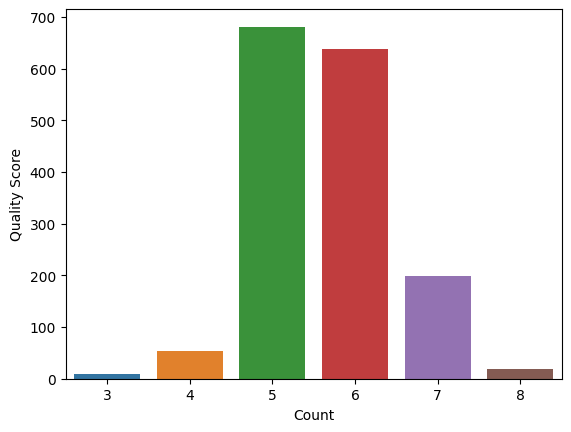

In [5]:
# Check wine quality distribution
plt.figure(dpi=100)
sns.countplot(data=data, x="quality")
plt.xlabel("Count")
plt.ylabel("Quality Score")
plt.show()


In [6]:
# Label quality into Good (1) and Bad (0)
data["quality"] = data["quality"].apply(lambda x: 1 if x >= 6.0 else 0)


In [7]:
# Calculate the correlation matrix
corr_matrix = data.corr()
# Plot heatmap
plt.figure(figsize=(12, 8), dpi=100)

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

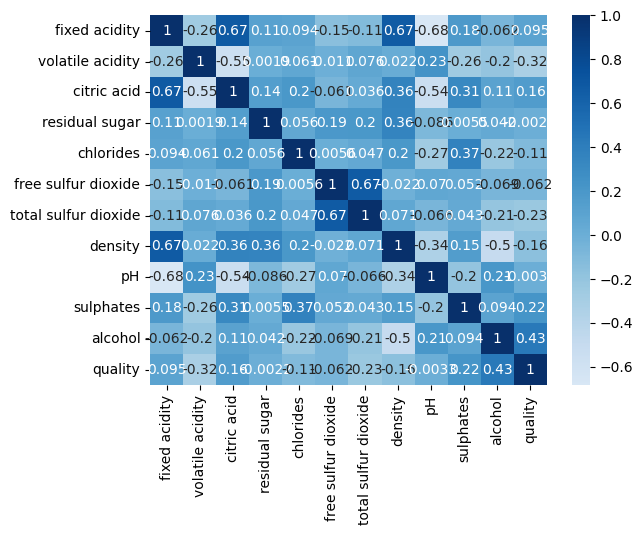

In [8]:
sns.heatmap(corr_matrix, center=0, cmap="Blues", annot=True)
plt.show()

In [9]:
# Drop the target variable
X = data.drop("quality", axis=1)
# Set the target variable as the label
y = data["quality"]

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
# Split the data into training and testing sets (20% testing and 80% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
# Create an object of the logistic regression model
logreg_model = LogisticRegression()
# Fit the model to the training data
logreg_model.fit(X_train, y_train)
# Predict the labels of the test set
y_pred = logreg_model.predict(X_test)

C:\Users\Nimuthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[104  37]
 [ 45 134]]


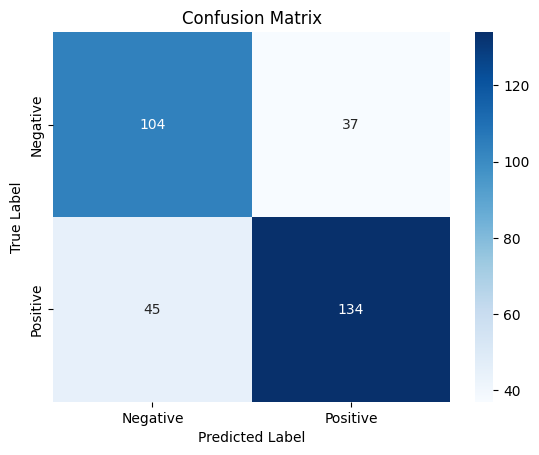

In [13]:
# Create the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)
sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [14]:

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
# Compute the precision of the model
precision = precision_score(y_test, y_pred)
# Compute the recall of the model
recall = recall_score(y_test, y_pred)
# Compute the F1 score of the model
f1 = f1_score(y_test, y_pred)
print(accuracy)
print(precision)
print(recall)
print(f1)


0.74375
0.783625730994152
0.7486033519553073
0.7657142857142857


In [15]:
print(accuracy)
print(precision)
print(recall)
print(f1)

0.74375
0.783625730994152
0.7486033519553073
0.7657142857142857


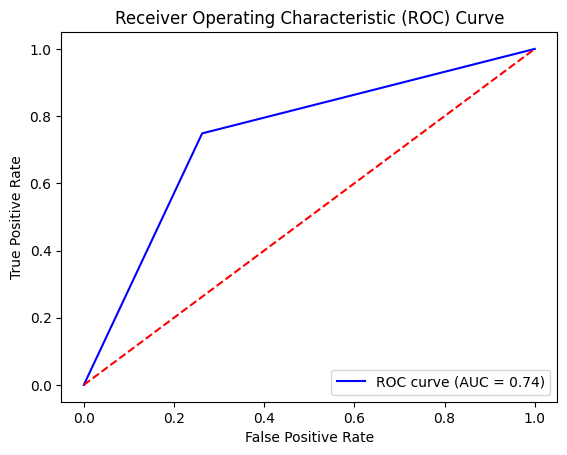

In [16]:
# y_true and y_score are the true labels and predicted scores, respectively
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.figure(dpi=100)
plt.plot(fpr, tpr, color="blue", label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()


In [17]:
# Create the Dash app
app = dash.Dash(__name__)
server = app.server

In [18]:
# Define the layout of the dashboard
app.layout = html.Div(
    children=[
    html.H1("CO544-2023 Lab 3: Wine Quality Prediction"),
    
# Layout for exploratory data analysis: correlation between two selected features
    html.Div([
    html.H3("Exploratory Data Analysis"),
html.Label("Feature 1 (X-axis)"),
dcc.Dropdown(
id="x_feature",
options=[{"label": col, "value": col} for col in data.columns],
value=data.columns[0]
)
], style={"width": "30%", "display": "inline-block"}),
html.Div([
html.Label("Feature 2 (Y-axis)"),
dcc.Dropdown(
id="y_feature",
options=[{"label": col, "value": col} for col in data.columns],
value=data.columns[1]
)
], style={"width": "30%", "display": "inline-block"}),
dcc.Graph(id="correlation_plot"),
    
# Layout for wine quality prediction based on input feature values
html.H3("Wine Quality Prediction"),
html.Div([
html.Label("Fixed Acidity"),
dcc.Input(id="fixed_acidity", type="number", required=True),
html.Label("Volatile Acidity"),
dcc.Input(id="volatile_acidity", type="number", required=True),
html.Label("Citric Acid"),
dcc.Input(id="citric_acid", type="number", required=True),
html.Br(),
html.Label("Residual Sugar"),
dcc.Input(id="residual_sugar", type="number", required=True),
html.Label("Chlorides"),
dcc.Input(id="chlorides", type="number", required=True),
html.Label("Free Sulfur Dioxide"),
dcc.Input(id="free_sulfur_dioxide", type="number", required=True),
html.Br(),

html.Label("Total Sulfur Dioxide"),
dcc.Input(id="total_sulfur_dioxide", type="number", required=True),
html.Label("Density"),
dcc.Input(id="density", type="number", required=True),
html.Label("pH"),
dcc.Input(id="ph", type="number", required=True),
html.Br(),
html.Label("Sulphates"),
dcc.Input(id="sulphates", type="number", required=True),
html.Label("Alcohol"),
dcc.Input(id="alcohol", type="number", required=True),
html.Br(),
]),
html.Div([
html.Button("Predict", id="predict-button", n_clicks=0),
]),
html.Div([
html.H4("Predicted Quality"),
html.Div(id="prediction-output")
])
])


In [ ]:
# Create the Dash app
app = dash.Dash(__name__)

In [ ]:
# Define the layout of the dashboard
app.layout = html.Div(
children=[
html.H1("CO544-2023 Lab 3: Wine Quality Prediction"),
    
# Layout for exploratory data analysis: correlation between two selected features
html.Div([
html.H3("Exploratory Data Analysis"),
html.Label("Feature 1 (X-axis)"),
dcc.Dropdown(
id="x_feature",
options=[{"label": col, "value": col} for col in data.columns],
value=data.columns[0]
)
], style={"width": "30%", "display": "inline-block"}),
html.Div([
html.Label("Feature 2 (Y-axis)"),
dcc.Dropdown(
id="y_feature",
options=[{"label": col, "value": col} for col in data.columns],
value=data.columns[1]
)
], style={"width": "30%", "display": "inline-block"}),
dcc.Graph(id="correlation_plot"),
    
# Layout for wine quality prediction based on input feature values
html.H3("Wine Quality Prediction"),
html.Div([
html.Label("Fixed Acidity"),
dcc.Input(id="fixed_acidity", type="number", required=True),
html.Label("Volatile Acidity"),
dcc.Input(id="volatile_acidity", type="number", required=True),
html.Label("Citric Acid"),
dcc.Input(id="citric_acid", type="number", required=True),
html.Br(),
html.Label("Residual Sugar"),
dcc.Input(id="residual_sugar", type="number", required=True),
html.Label("Chlorides"),
dcc.Input(id="chlorides", type="number", required=True),
html.Label("Free Sulfur Dioxide"),
dcc.Input(id="free_sulfur_dioxide", type="number", required=True),
html.Br(),

html.Label("Total Sulfur Dioxide"),
dcc.Input(id="total_sulfur_dioxide", type="number", required=True),
html.Label("Density"),
dcc.Input(id="density", type="number", required=True),
html.Label("pH"),
dcc.Input(id="ph", type="number", required=True),
html.Br(),
html.Label("Sulphates"),
dcc.Input(id="sulphates", type="number", required=True),
html.Label("Alcohol"),
dcc.Input(id="alcohol", type="number", required=True),
html.Br(),
]),
html.Div([
html.Button("Predict", id="predict-button", n_clicks=0),
]),
html.Div([
html.H4("Predicted Quality"),
html.Div(id="prediction-output")
])
])

In [19]:
# Define the callback to update the correlation plot
@app.callback(
    dash.dependencies.Output("correlation_plot", "figure"),
    [dash.dependencies.Input("x_feature", "value"),
    dash.dependencies.Input("y_feature", "value")]
)
def update_correlation_plot(x_feature, y_feature):
    fig = px.scatter(data, x=x_feature, y=y_feature, color="quality")
    fig.update_layout(title=f"Correlation between {x_feature} and {y_feature}")
    return fig

# Define the callback function to predict wine quality
@app.callback(
    Output(component_id="prediction-output", component_property="children"),
    [Input("predict-button", "n_clicks")],
    [State("fixed_acidity", "value"),
    State("volatile_acidity", "value"),
    State("citric_acid", "value"),
    State("residual_sugar", "value"),
    State("chlorides", "value"),
    State("free_sulfur_dioxide", "value"),
    State("total_sulfur_dioxide", "value"),
    State("density", "value"),
    State("ph", "value"),
    State("sulphates", "value"),
    State("alcohol", "value")]
)
def predict_quality(n_clicks, fixed_acidity, volatile_acidity, citric_acid,
residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide,
density, ph, sulphates, alcohol):
    
# Create input features array for prediction
    input_features = np.array([fixed_acidity, volatile_acidity, citric_acid,
        residual_sugar, chlorides, free_sulfur_dioxide,
        total_sulfur_dioxide, density, ph, sulphates, alcohol]).reshape(1, -1)

    # Predict the wine quality (0 = bad, 1 = good)
    prediction = logreg_model.predict(input_features)[0]
# Return the prediction
    if prediction == 1:
        return "This wine is predicted to be good quality."
    else:
        return "This wine is predicted to be bad quality."

In [ ]:
if __name__ == "__main__":
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit


In [ ]:
if __name__ == "__main__":
    app.run_server(debug=False)

In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# For data analysis
import pandas as pd
# For model creation and performance evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
# For visualizations and interactive dashboard creation
import dash
from dash import dcc, html
from dash.dependencies import Input, Output, State
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [134]:
#Using Random Forest
# Load dataset
data = pd.read_csv("winequality-red.csv")

In [135]:
# check for missing values
print(data.isnull().sum())
# drop rows with missing values
data.dropna(inplace=True)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [136]:
# Drop duplicate rows
data.drop_duplicates(keep="first")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [137]:
# Label quality into Good (1) and Bad (0)
data["quality"] = data["quality"].apply(lambda x: 1 if x >= 6.0 else 0)

In [138]:
# Drop the target variable
X = data.drop("quality", axis=1)
# Set the target variable as the label
y = data["quality"]

In [139]:
# Split the data into training and testing sets (20% testing and 80% training)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.20, random_state=42)

In [140]:
# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train_rf, y_train_rf)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test_rf)

In [141]:
# Create the confusion matrix
confusion_mat_rf = confusion_matrix(y_test_rf, y_pred_rf)
print(confusion_mat_rf)

[[109  32]
 [ 35 144]]


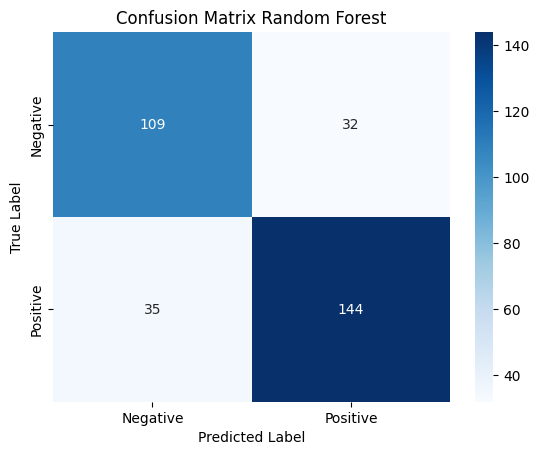

In [142]:
sns.heatmap(confusion_mat_rf, annot=True, cmap="Blues", fmt="d", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Random Forest")
plt.show()

In [213]:

# Compute the accuracy of the model
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
# Compute the precision of the model
precision_rf = precision_score(y_test_rf, y_pred_rf)
# Compute the recall of the model
recall_rf = recall_score(y_test_rf, y_pred_rf)
# Compute the F1 score of the model
f1_rf = f1_score(y_test_rf, y_pred_rf)
print("Accuracy: %0.5f" % accuracy_rf)

Accuracy: 0.79063


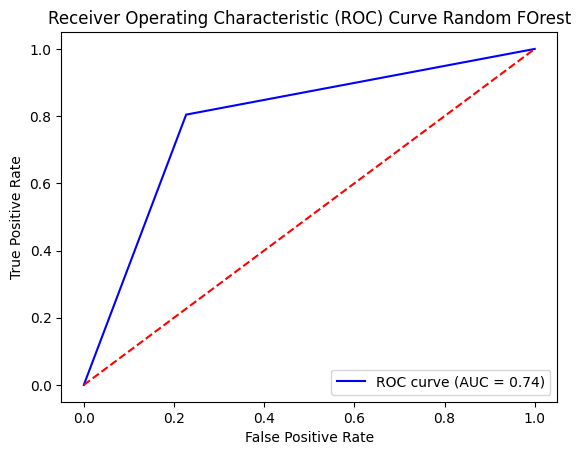

In [144]:
# y_true and y_score are the true labels and predicted scores, respectively
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_rf, y_pred_rf)
auc_score_rf = roc_auc_score(y_test_rf, y_pred_rf)
plt.figure(dpi=100)
plt.plot(fpr_rf, tpr_rf, color="blue", label="ROC curve (AUC = %0.2f)" % auc_score)
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve Random FOrest")
plt.legend(loc="lower right")
plt.show()


In [145]:
# Obtain the feature importance scores
importance_scores = rf_classifier.feature_importances_

In [146]:
# Sort the feature importance scores in descending order
sorted_indices = importance_scores.argsort()[::-1]
sorted_scores = importance_scores[sorted_indices]

In [147]:
# Print the feature importance scores
for feature, score in zip(X.columns[sorted_indices], sorted_scores):
    print(feature, ":", score)

alcohol : 0.21246810139124198
sulphates : 0.13907236656458707
volatile acidity : 0.10976448439439862
total sulfur dioxide : 0.09757449236322709
density : 0.09278523963109947
chlorides : 0.06778549779409146
fixed acidity : 0.0642848534706172
pH : 0.05904362253791808
citric acid : 0.058435339823160855
residual sugar : 0.05093686345233352
free sulfur dioxide : 0.047849138577324576


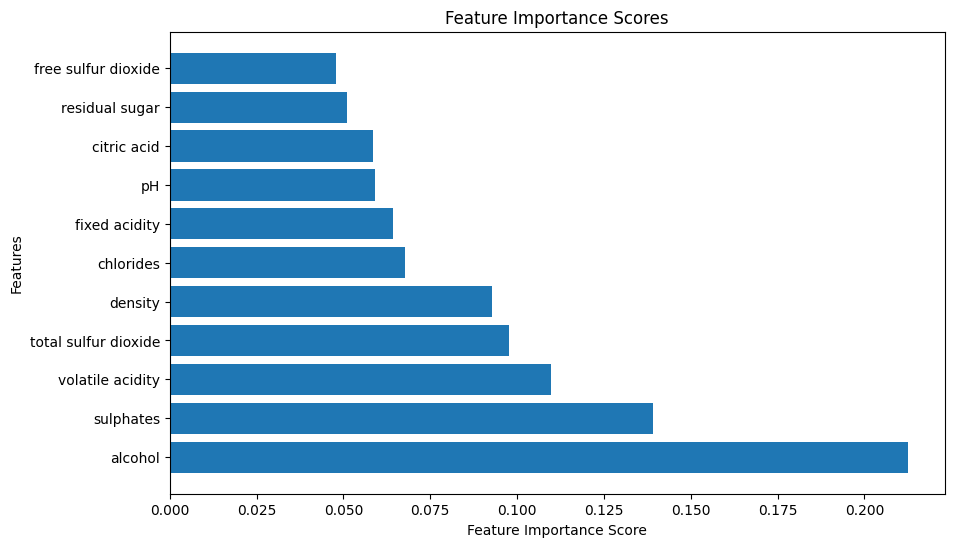

In [148]:
# Plot the feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance_scores)), sorted_scores, tick_label=X.columns[sorted_indices])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

In [149]:
# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance_scores})

In [206]:
# Set a threshold for discarding features (e.g., 0.05)
threshold = 0.055

In [207]:
# Filter out features below the threshold
selected_features = feature_importance_df.loc[feature_importance_df['Importance'] >= threshold, 'Feature'].tolist()

# Filter the original data to keep only the selected features
X_selected = X[selected_features]

In [208]:
# Split the data into training and testing sets (20% testing and 80% training) - selected features only
X_train_rf_sel1, X_test_rf_sel1, y_train_rf_sel1, y_test_rf_sel1 = train_test_split(X_selected, y, test_size=0.20, random_state=42)

In [209]:
# Create an instance of the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train_rf_sel1, y_train_rf_sel1)

# Make predictions on the test data
y_pred_rf_sel1 = rf_classifier.predict(X_test_rf_sel1)

[[110  31]
 [ 31 148]]


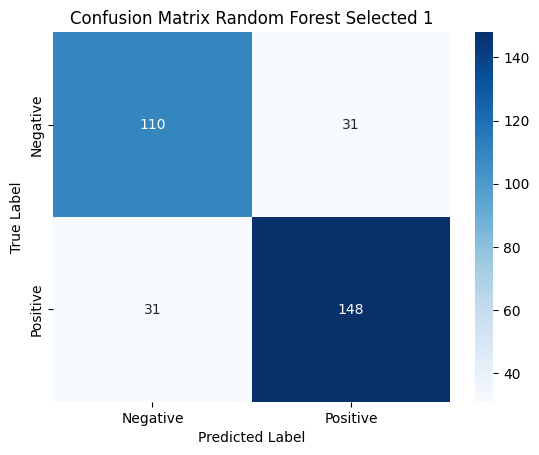

In [210]:
# Create the confusion matrix
confusion_mat_rf_sel1 = confusion_matrix(y_test_rf_sel1, y_pred_rf_sel1)
print(confusion_mat_rf_sel1)
sns.heatmap(confusion_mat_rf_sel1, annot=True, cmap="Blues", fmt="d", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Random Forest Selected 1")
plt.show()

In [211]:
# Compute the accuracy of the model
accuracy_rf_sel1 = accuracy_score(y_test_rf_sel1, y_pred_rf_sel1)
# Compute the precision of the model
precision_rf_sel1 = precision_score(y_test_rf_sel1, y_pred_rf_sel1)
# Compute the recall of the model
recall_rf_sel1 = recall_score(y_test_rf_sel1, y_pred_rf_sel1)
# Compute the F1 score of the model
f1_rf_sel1 = f1_score(y_test_rf_sel1, y_pred_rf_sel1)
print(accuracy_rf_sel1)
print(precision_rf_sel1)
print(recall_rf_sel1)
print(f1_rf_sel1)

0.80625
0.8268156424581006
0.8268156424581006
0.8268156424581006


In [216]:
discarded = set(X_selected)
print(discarded)

{'density', 'total sulfur dioxide', 'alcohol', 'volatile acidity', 'sulphates', 'fixed acidity', 'chlorides', 'pH', 'citric acid'}


In [218]:
discarded = set(X) - set(X_selected)
print(discarded)

{'free sulfur dioxide', 'residual sugar'}


In [243]:
# Split the data into training and testing sets (20% testing and 80% training)
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X, y, test_size=0.05, random_state=42)

C:\Users\Nimuthu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[28 11]
 [12 29]]


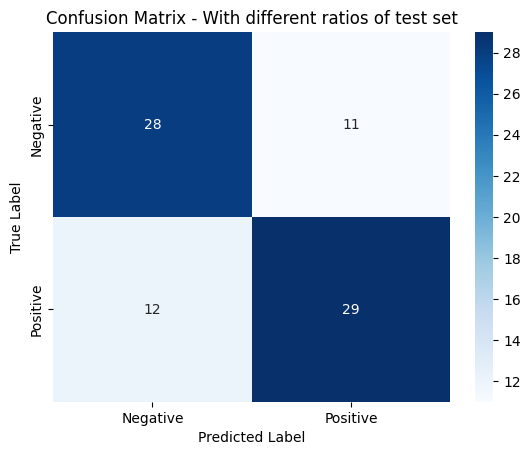

0.7125
0.725
0.7073170731707317
0.7160493827160495


In [244]:
# Create an object of the logistic regression model
logreg_model = LogisticRegression()
# Fit the model to the training data
logreg_model.fit(X_train_t, y_train_t)
# Predict the labels of the test set
y_pred_t = logreg_model.predict(X_test_t)

# Create the confusion matrix
confusion_mat_t = confusion_matrix(y_test_t, y_pred_t)
print(confusion_mat_t)
sns.heatmap(confusion_mat_t, annot=True, cmap="Blues", fmt="d", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - With different ratios of test set")
plt.show()

# Compute the accuracy of the model
accuracy_t = accuracy_score(y_test_t, y_pred_t)
# Compute the precision of the model
precision_t = precision_score(y_test_t, y_pred_t)
# Compute the recall of the model
recall_t = recall_score(y_test_t, y_pred_t)
# Compute the F1 score of the model
f1_t = f1_score(y_test_t, y_pred_t)
print(accuracy_t)
print(precision_t)
print(recall_t)
print(f1_t)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [14]:
# Split the data into training and testing sets (20% testing and 80% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)